In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py
import settings.Constants as const

In [2]:
with h5py.File(const.saddlePointFile, 'r') as f:
    saddle_points = f['SaddlePoint/saddle_points'][:]
    couplingValue = f['SaddlePoint/coupling'][()]
    Tvalue = f['SaddlePoint/T'][()]
    voltageSpacePlot = f['SaddlePoint/voltageSpacePlot'][:]
    lambdaSpacePlot = f['SaddlePoint/lambdaSpacePlot'][:]
    
    phi_voltage = f['SaddlePoint/phi-Voltage'][:]
    
    lambdaSamples = f['SaddlePoint/lambdaSamples'][:]
    voltageSamples = f['SaddlePoint/voltageSamples'][:]
    
    colorsVoltage = f['SaddlePoint/colorsVoltage'][:]
    colorsLambda = f['SaddlePoint/colorsLambda'][:]


phiSamples = saddle_points[:,1]


f.close()

In [3]:
with h5py.File(const.shotNoiseFile, 'r') as f:
    omegaSpace = f['ShotNoise/NonIntOmegaSpace'][:]
    retardedNonInt = f['ShotNoise/NonIntRetardedOmega'][:]
    keldyshNonInt = f['ShotNoise/NonIntKeldyshOmega'][:]
    
    retardedInt = f['ShotNoise/IntRetardedOmega'][:]
    keldyshInt = f['ShotNoise/IntKeldyshOmega'][:]
    
    retardedNonIntZero = f['ShotNoise/NonIntRetardedLambdaZero'][:]
    keldyshNonIntZero = f['ShotNoise/NonIntKeldyshLambdaZero'][:]
    
    omegaSpace = f['ShotNoise/omegaSpace'][:]
    DRdata = f['ShotNoise/DRdata'][:]
    DKdata = f['ShotNoise/DKdata'][:]
    
f.close()

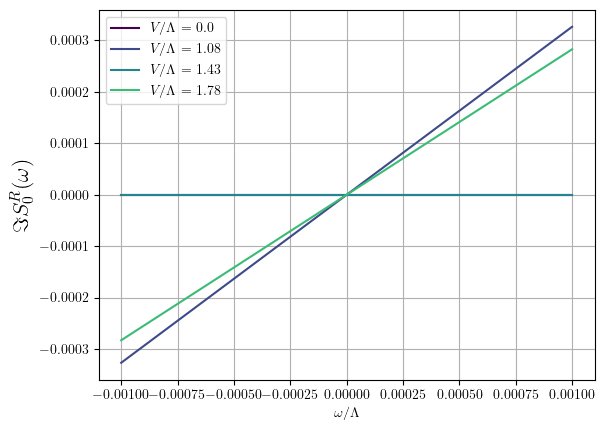

In [4]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSamples)):
    plt.plot(omegaSpace, retardedNonIntZero[i,:].real,  label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.grid()
plt.xlabel(r'$\omega/\Lambda$')
plt.ylabel(r'$\Im S_0^R(\omega)$', fontsize=16)
plt.savefig('figures/retardedNonIntZeroLambda.pdf')

Text(0.5, 0, '$\\omega/\\Lambda$')

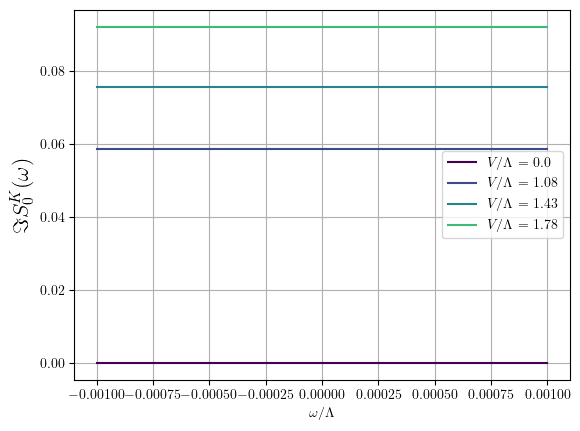

In [5]:

### high voltage limit
# func = couplingValue*np.ones_like(omegaSpace) - 2*couplingValue**3*np.reciprocal(4*couplingValue**2 + omegaSpace**2)

plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSamples)):
    plt.plot(omegaSpace, keldyshNonIntZero[i,:].real,  label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.grid()
plt.ylabel(r'$\Im S_0^K(\omega)$', fontsize=16)
plt.xlabel(r'$\omega/\Lambda$')
# plt.savefig('figures/keldyshNonIntZeroLambda.pdf')

Text(0, 0.5, '$\\Im S_0^R(\\omega)/ S_0^K(\\omega)$')

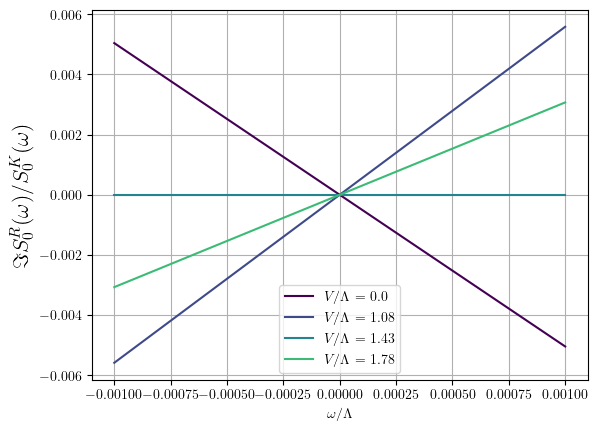

In [6]:


plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSamples)):
    plt.plot(omegaSpace, retardedNonIntZero[i,:].real/keldyshNonIntZero[i,:].real,  label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.grid()
plt.xlabel(r'$\omega/\Lambda$')
plt.ylabel(r'$\Im S_0^R(\omega)/ S_0^K(\omega)$', fontsize=16)
# plt.savefig('figures/ShotNoiseZeroLambdaTotRatio.pdf')


In [7]:
lambdaUpper = lambdaSamples[-1]
lambdaLower = lambdaSamples[0]

voltageZero = voltageSamples[0]
voltageLower = voltageSamples[1]
voltageCritical = voltageSamples[2]
voltageUpper = voltageSamples[-1]

phiZero = phiSamples[0]
phiLower = phiSamples[1]
phiCritical = phiSamples[2]
phiUpper = phiSamples[-1]

phi_voltage_func = scipy.interpolate.interp1d(voltageSpacePlot, phi_voltage[1, :], kind='linear')


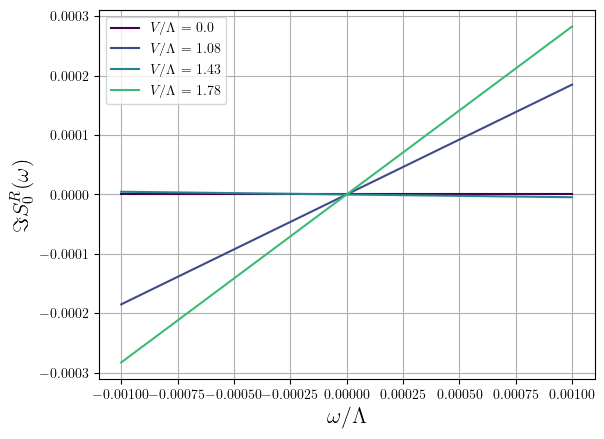

In [8]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSamples)):
    plt.plot(omegaSpace, retardedNonInt[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.xlabel(r'$\omega/\Lambda$', fontsize=16)
plt.ylabel(r'$\Im S_0^R(\omega)$', fontsize=16)
plt.grid()
# plt.savefig('figures/shotRetardedNonIntOmega.pdf', format='pdf')

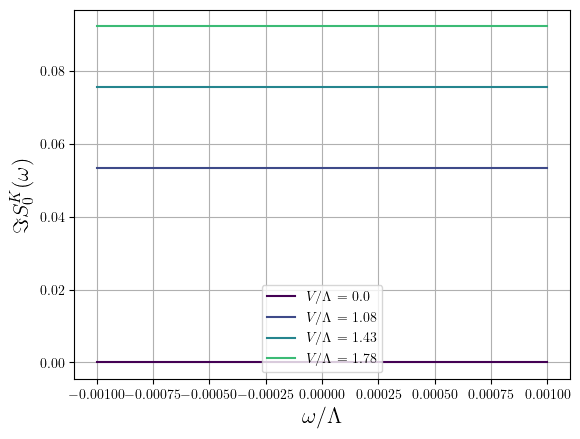

In [9]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSamples)):
    plt.plot(omegaSpace, keldyshNonInt[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.xlabel(r'$\omega/\Lambda$', fontsize=16)
plt.ylabel(r'$\Im S_0^K(\omega)$', fontsize=16)
plt.grid()
# plt.savefig('figures/shotKeldyshNonIntOmega.pdf')

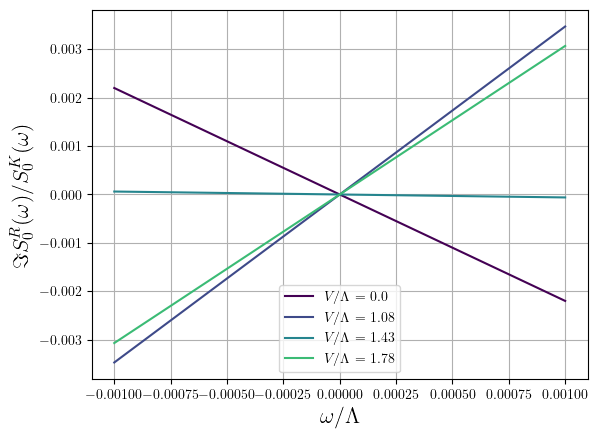

In [10]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSamples)):
    plt.plot(omegaSpace, retardedNonInt[i,:].real/keldyshNonInt[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.xlabel(r'$\omega/\Lambda$', fontsize=16)
plt.ylabel(r'$\Im S_0^R(\omega)/ S_0^K(\omega)$', fontsize=16)
plt.grid()
# plt.savefig('figures/ShotNoiseNonIntTotRatio.pdf')

In [11]:
# counter = 2
# plt.plot(omegaSpace, keldyshInt[counter,:].real)
# plt.plot(omegaSpace, keldyshInt[counter,:].imag)
# # plt.plot(omegaSpace, keldyshInt[counter+2,:].real)
# # plt.plot(omegaSpace, keldyshInt[counter+2,:].imag)
# plt.grid()

In [12]:
shotTotKeldyh = keldyshNonInt.real - keldyshInt.imag
shotTotRetarded = retardedNonInt.real - 2*retardedInt.imag

In [13]:
print(shotTotKeldyh.shape)

(4, 2)


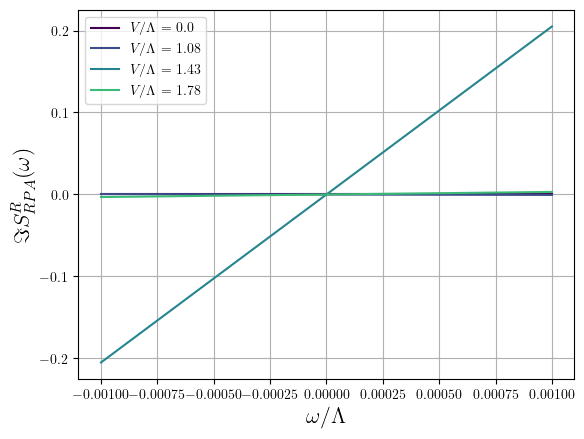

In [14]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSamples)):
    plt.plot(omegaSpace, shotTotRetarded[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
    # plt.plot(omegaSpace, shotTotRetarded[i, :].real, '.')
# plt.plot(omegaSpace, shotTotRetarded[0, :].real)
# plt.plot(omegaSpace, shotTotRetarded[1, :].real, '.')
# plt.plot(omegaSpace, shotTotRetarded[2, :].real)
plt.legend()
plt.xlabel(r'$\omega/\Lambda$', fontsize=16)
plt.ylabel(r'$\Im S_{RPA}^R(\omega)$', fontsize=16)
plt.grid()
# plt.savefig("figures/ShotNoiseTotRetarded.pdf")

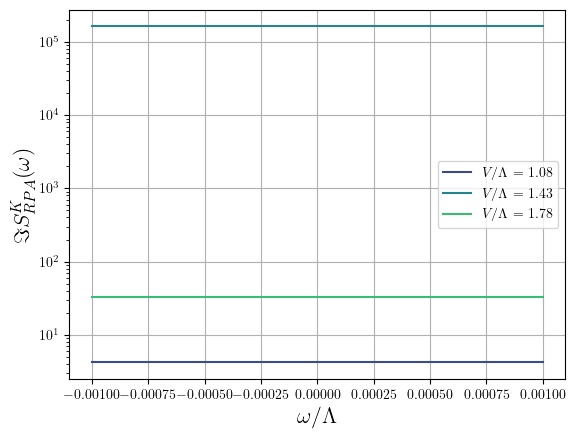

In [15]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(1,len(voltageSamples)):
    plt.plot(omegaSpace, shotTotKeldyh[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.xlabel(r'$\omega/\Lambda$', fontsize=16)
plt.ylabel(r'$\Im S_{RPA}^K(\omega)$', fontsize=16)
plt.grid()
plt.yscale('log')
# plt.savefig("figures/ShotNoiseTotKeldysh.pdf")

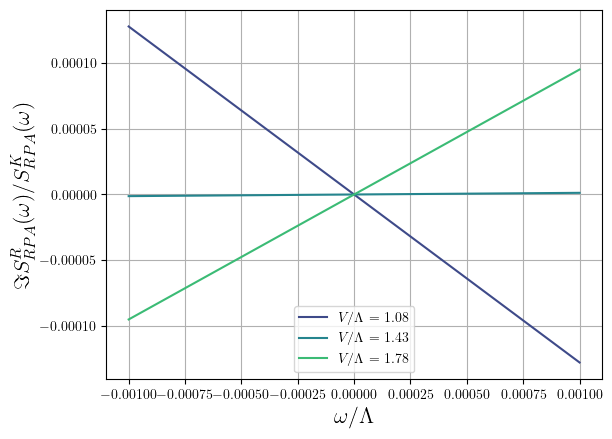

In [16]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(1,len(voltageSamples)):
    plt.plot(omegaSpace, shotTotRetarded[i,:].real/shotTotKeldyh[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSamples[i],2)), color=colorsVoltage[i])
plt.legend()
plt.xlabel(r'$\omega/\Lambda$', fontsize=16)
plt.ylabel(r'$\Im S_{RPA}^R(\omega)/  S_{RPA}^K(\omega)$', fontsize=16)
plt.grid()
# plt.savefig("figures/ShotNoiseTotRatioZero1.pdf")